In [3]:
import pandas as pd
data = pd.read_csv('processed_data.csv')

In [5]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Select relevant features
features = ['Facility Age', 'Fencing Available Numeric', 'Lighting Available Numeric']
data_cleaned = data.dropna(subset=features)

# Extract the feature matrix
X = data_cleaned[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Initialize and fit the Isolation Forest model
isolation_forest = IsolationForest(random_state=42, contamination=0.1)  # Set contamination (e.g., 10% anomalies)
data_cleaned['Anomaly Score'] = isolation_forest.fit_predict(X_scaled)

# Anomalies are labeled as -1; normal points are labeled as 1
data_cleaned['Is Anomaly'] = data_cleaned['Anomaly Score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

/var/folders/ps/1nrhzmyx2gn5r_v_r7dcfx880000gn/T/ipykernel_13851/1504825454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Anomaly Score'] = isolation_forest.fit_predict(X_scaled)
/var/folders/ps/1nrhzmyx2gn5r_v_r7dcfx880000gn/T/ipykernel_13851/1504825454.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Is Anomaly'] = data_cleaned['Anomaly Score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')


Anomaly Counts:
 Is Anomaly
Normal     6066
Anomaly     673
Name: count, dtype: int64


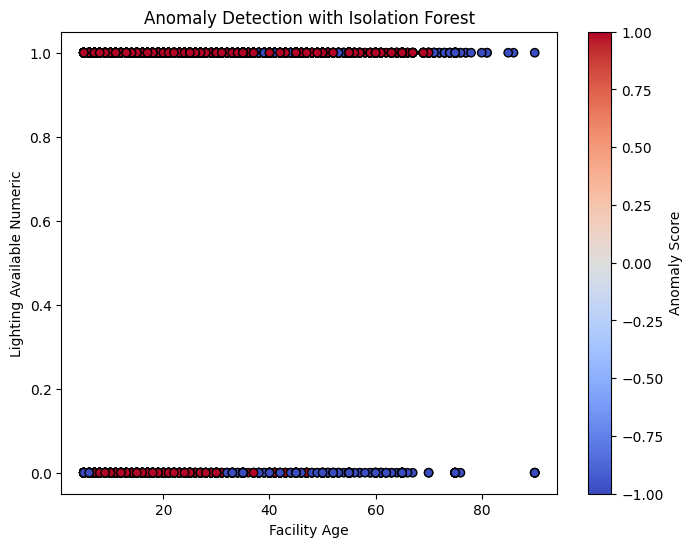

Anomalies Detected:
      Municipality Settlement           ID                      Facility Type  \
15      אבן יהודה        NaN  021G3308679       אולם ספורט בינוני – 32x19 מ'   
30      אבן יהודה        NaN  021G1100777          אולם ספורט קטן – 20x10 מ'   
31      אבן יהודה        NaN  021P2102276              בריכת שחיה - 20X50 מ'   
34     אום אל-פחם        NaN  154B3108638  מגרש ספורט במידות אחרות – לא תקני   
35     אום אל-פחם        NaN  154B3108639  מגרש ספורט במידות אחרות – לא תקני   
...           ...        ...          ...                                ...   
8728  תל אביב-יפו        NaN  201B3104494  מגרש ספורט במידות אחרות – לא תקני   
8730  תל אביב-יפו        NaN  201G2101269          אולם ספורט קטן – 15x24 מ'   
8745      תל מונד        NaN  661F1104263             מגרש כדורגל – 45X90 מ'   
8750      תל מונד        NaN  661G1101683          אולם ספורט קטן – 20x10 מ'   
8754      תל מונד        NaN  661B1101684             מגרש כדורסל – 19X32 מ'   

              Faci

In [13]:
# Count anomalies and normal points
anomaly_counts = data_cleaned['Is Anomaly'].value_counts()
print("Anomaly Counts:\n", anomaly_counts)

# Visualize anomalies in a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['Facility Age'], data_cleaned['Lighting Available Numeric'], 
            c=data_cleaned['Anomaly Score'], cmap='coolwarm', edgecolor='k')
plt.xlabel('Facility Age')
plt.ylabel('Lighting Available Numeric')
plt.title('Anomaly Detection with Isolation Forest')
plt.colorbar(label='Anomaly Score')
plt.show()

# Display facilities marked as anomalies
anomalies = data_cleaned[data_cleaned['Is Anomaly'] == 'Anomaly']
print("Anomalies Detected:\n", anomalies)